This notebook compares the distribution of stochastic model output for various modeling methods for eta transitioning. We see that the original method, logistic regression with cubic polynomials for each variable, does not produce extreme enough values. However, as the polynomial degree of the inputs is increased, the stochastic model begins producing extreme values close and closer to the true distribution. The multilayer perceptron produces more extreme values than the cubic polynomial logistic regression model, but the shape of the distribution it produces is skewed.

In [1]:
from uwnet.stochastic_parameterization.stochastic_state_model import StochasticStateModel
from uwnet.stochastic_parameterization.examine_stochastic_state_model import (
    compare_true_to_simulated_q1_q2_distributions,
)
dir_ = '/Users/stewart/projects/uwnet/uwnet/stochastic_parameterization/'
base_model_location = dir_ + 'full_model/1.pkl'
ds_location = dir_ + 'training.nc'
kwargs_ = {
    'base_model_location': base_model_location,
    'ds_location': ds_location,
    't_start': 0,
    't_stop': 100,
    'binning_quantiles': (0.0073, 0.0557, 0.3024, 0.5967, 0.8348, 0.9666, 1.),
    'verbose': False}
base_model = StochasticStateModel(
    ds_location,
    t_start=0,
    t_stop=50,
    base_model_location=base_model_location,
    ds_location=ds_location,
    verbose=False,
    binning_quantiles=(1,),
)
base_model.train()
%matplotlib inline



True QT Variance: 312.93977063545304
Stochastic QT Variance: 238.74650795669132
Base Model QT Variance: 143.5491197307265
True sli Variance: 276198.3206630993
Stochastic sli Variance: 209517.17054657743
Base Model sli Variance: 150808.50850022078


True QT Mean: -5.935742227652129
Stochastic QT Mean: -5.899538922274295
Base Model QT Mean: -6.188679563568588
True sli Mean: 216.43305633054717
Stochastic sli Mean: 186.29979990552434
Base Model sli Mean: 175.61554739339127


SLI R2 Stochastic Model:  0.41291683712009175
SLI R2 Single Model Model:  0.6809314438939436
QT R2 Stochastic Model:  0.25312497198134454
QT R2 Single Model Model:  0.6168522071105917


SLI MSE Stochastic Model:  162151.38367701144
SLI MSE Single Model Model:  88126.19937289266
QT MSE Stochastic Model:  233.72689996150564
QT MSE Single Model Model:  119.90218242629147


KS Divergence test: QT true vs single model: Ks_2sampResult(statistic=0.21057506443298968, pvalue=0.0)
KS Divergence test: QT true vs stochastic mode

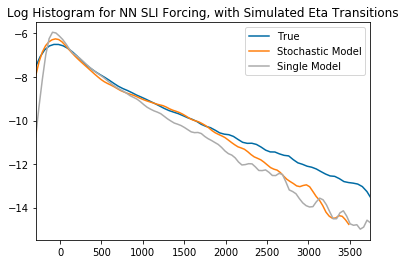

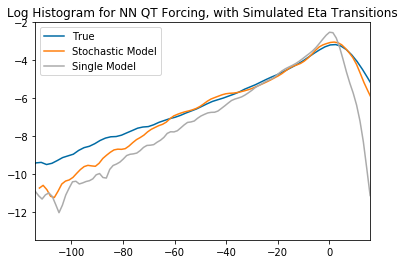

In [2]:
from sklearn.linear_model import LogisticRegression
logistic_regression = StochasticStateModel(
    eta_transitioner_model=LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000),
    eta_transitioner_poly_degree=3,
    **kwargs_
)
logistic_regression.train()
compare_true_to_simulated_q1_q2_distributions(logistic_regression, base_model, true_etas=False, only_tropics=True)



True QT Variance: 312.93977063545304
Stochastic QT Variance: 320.90992875131104
Base Model QT Variance: 143.5491197307265
True sli Variance: 276198.3206630993
Stochastic sli Variance: 262733.4110517715
Base Model sli Variance: 150808.50850022078


True QT Mean: -5.935742227652129
Stochastic QT Mean: -8.718672048756357
Base Model QT Mean: -6.188679563568588
True sli Mean: 216.43305633054717
Stochastic sli Mean: 257.391946405517
Base Model sli Mean: 175.61554739339127


SLI R2 Stochastic Model:  0.27573872409166655
SLI R2 Single Model Model:  0.6809314438939436
QT R2 Stochastic Model:  0.0322724057149415
QT R2 Single Model Model:  0.6168522071105917


SLI MSE Stochastic Model:  200039.7481271953
SLI MSE Single Model Model:  88126.19937289266
QT MSE Stochastic Model:  302.840451393165
QT MSE Single Model Model:  119.90218242629147


KS Divergence test: QT true vs single model: Ks_2sampResult(statistic=0.21057506443298968, pvalue=0.0)
KS Divergence test: QT true vs stochastic model: Ks_2

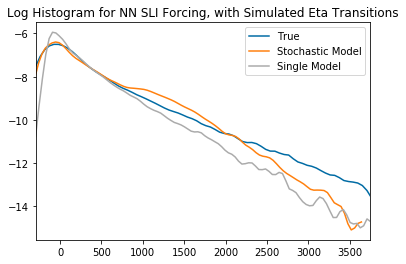

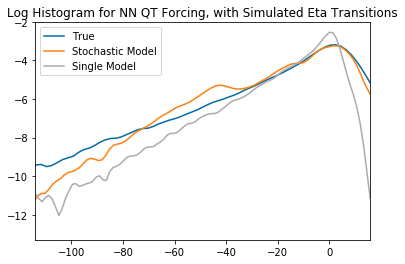

In [3]:
from sklearn.neural_network import MLPClassifier
mlp = StochasticStateModel(
    eta_transitioner_model=MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000),
    eta_transitioner_poly_degree=1,
    **kwargs_
)
mlp.train()
compare_true_to_simulated_q1_q2_distributions(mlp, base_model, true_etas=False, only_tropics=True)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = StochasticStateModel(
    eta_transitioner_model=MLPClassifier(hidden_layer_sizes=(250,), max_iter=1000),
    eta_transitioner_poly_degree=1,
    **kwargs_
)
mlp.train()
compare_true_to_simulated_q1_q2_distributions(mlp, base_model, true_etas=False, only_tropics=True)

/anaconda3/envs/uwnet/lib/python3.6/site-packages/numpy/core/_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)




True QT Variance: 312.93977063545304
Stochastic QT Variance: 277.15438993243265
Base Model QT Variance: 143.5491197307265
True sli Variance: 276198.3206630993
Stochastic sli Variance: 240062.2611837913
Base Model sli Variance: 150808.50850022078


True QT Mean: -5.935742227652129
Stochastic QT Mean: -6.6782304807122
Base Model QT Mean: -6.188679563568588
True sli Mean: 216.43305633054717
Stochastic sli Mean: 208.281957011033
Base Model sli Mean: 175.61554739339127


SLI R2 Stochastic Model:  0.38016780713548726
SLI R2 Single Model Model:  0.6809314438939436
QT R2 Stochastic Model:  0.20688663175058253
QT R2 Single Model Model:  0.6168522071105917


SLI MSE Stochastic Model:  171196.61076210468
SLI MSE Single Model Model:  88126.19937289266
QT MSE Stochastic Model:  248.1967155478843
QT MSE Single Model Model:  119.90218242629147


KS Divergence test: QT true vs single model: Ks_2sampResult(statistic=0.21057506443298968, pvalue=0.0)
KS Divergence test: QT true vs stochastic model: Ks_

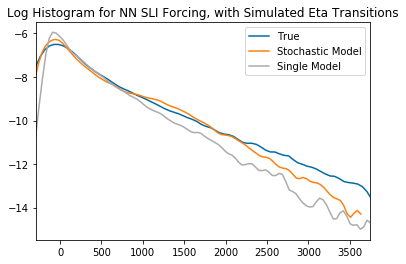

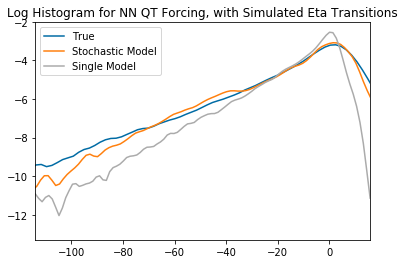

In [4]:
from sklearn.linear_model import LogisticRegression
logistic_regression = StochasticStateModel(
    eta_transitioner_model=LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000),
    eta_transitioner_poly_degree=6,
    **kwargs_
)
logistic_regression.train()
compare_true_to_simulated_q1_q2_distributions(logistic_regression, base_model, true_etas=False, only_tropics=True)

/anaconda3/envs/uwnet/lib/python3.6/site-packages/numpy/core/_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/anaconda3/envs/uwnet/lib/python3.6/site-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)




True QT Variance: 312.93977063545304
Stochastic QT Variance: 277.79920336102566
Base Model QT Variance: 143.5491197307265
True sli Variance: 276198.3206630993
Stochastic sli Variance: 241196.66487904542
Base Model sli Variance: 150808.50850022078


True QT Mean: -5.935742227652129
Stochastic QT Mean: -6.761851021940343
Base Model QT Mean: -6.188679563568588
True sli Mean: 216.43305633054717
Stochastic sli Mean: 210.05542153912685
Base Model sli Mean: 175.61554739339127


SLI R2 Stochastic Model:  0.3722792746835588
SLI R2 Single Model Model:  0.6809314438939436
QT R2 Stochastic Model:  0.19915327537489735
QT R2 Single Model Model:  0.6168522071105917


SLI MSE Stochastic Model:  173375.41017782368
SLI MSE Single Model Model:  88126.19937289266
QT MSE Stochastic Model:  250.61679031833347
QT MSE Single Model Model:  119.90218242629147


KS Divergence test: QT true vs single model: Ks_2sampResult(statistic=0.21057506443298968, pvalue=0.0)
KS Divergence test: QT true vs stochastic model

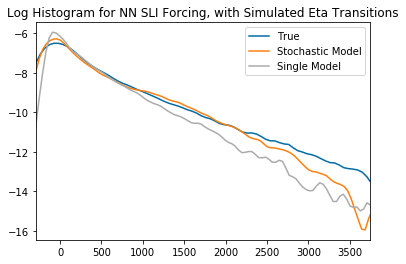

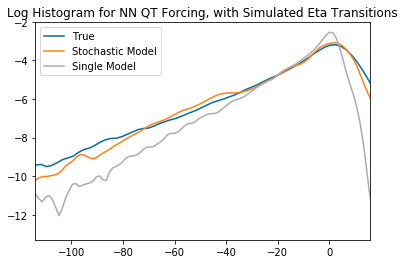

In [5]:
from sklearn.linear_model import LogisticRegression
logistic_regression = StochasticStateModel(
    eta_transitioner_model=LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000),
    eta_transitioner_poly_degree=9,
    **kwargs_
)
logistic_regression.train()
compare_true_to_simulated_q1_q2_distributions(logistic_regression, base_model, true_etas=False, only_tropics=True)